# Predictive Modeling

After data exploration, we now enter the predictive modeling task. In this notebook we will implement several machine learning algorithms from scikit-learn library. Those algorithms are:

- KNeighborsClassifier
- LogisticRegression
- LinearSVC
- GaussianNB
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- SVC

On each of these algorithms, we will explore parameters tuning and compare which model do the predictive modeling very well. 

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('iris.csv')

Apply small changes to make our dataset more easy to interpret:

In [3]:
dataset = dataset.drop(columns=['Id'])

In [4]:
dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
dataset = dataset.replace(to_replace='Iris-setosa', value='Setosa', regex=True)
dataset = dataset.replace(to_replace='Iris-virginica', value='Virginica', regex=True)
dataset = dataset.replace(to_replace='Iris-versicolor', value='Versicolor', regex=True)

In [6]:
# take a look to five datapoints on top
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Pairplot to give us visual representation:

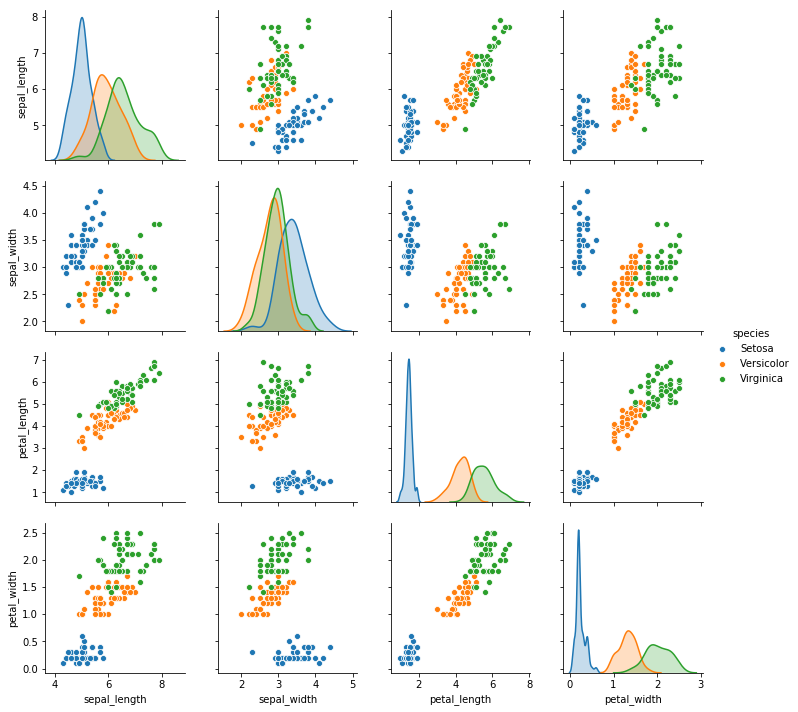

In [7]:
sns.pairplot(dataset, hue='species');

Create feature matrix and target vector, then split the dataset into training set and test set.

In [8]:
X = dataset.iloc[:, :4].values
y = dataset['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


Now we have 120 data points in training set and 30 data points in test set.

---

## KNeighborsClassifier

First model to consider is KNeighborsClassifier. A common algorithm to start with, because of its speed and simplicity.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# we start by instantiate the model and set n_neighbors parameter to 1.
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train);

Take a look on several predicted values and compare it to the actual values on test set

In [10]:
y_pred = knc.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


On first ten data points, prediction by KNeighborsClassifier shows us well done performance, with only one closest neighbor to consider. But what the actual score for training set and test set are? 

In [11]:
print("Training set score: {:.3f}".format(knc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knc.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.974


Perfect score on training set and 97% on test set. Now we will see what happen if we change the n_neighbors parameter:

In [12]:
knc1 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print("Training set score: {:.3f}".format(knc1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knc1.score(X_test, y_test)))

Training set score: 0.964
Test set score: 0.974


In [13]:
knc2 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
print("Training set score: {:.3f}".format(knc2.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knc2.score(X_test, y_test)))

Training set score: 0.973
Test set score: 0.974


To have a knowledge about how tuning n_neighbors parameter will change the score for both traning set and test set. Let's make a graph for model complexity vs score.

In [14]:
train_score = []
test_score = []
for i in range(1, 11):
    knc = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    train_score.append(knc.score(X_train, y_train))
    test_score.append(knc.score(X_test, y_test))

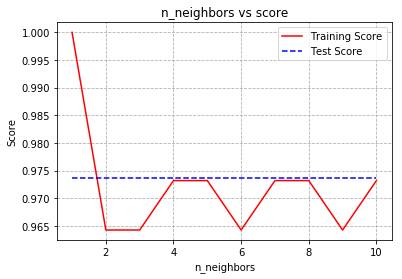

In [15]:
plt.plot(np.arange(1, 11), train_score, '-r', label='Training Score')
plt.plot(np.arange(1, 11), test_score, '--b', label='Test Score')
plt.grid(True, linestyle='--')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title("n_neighbors vs score")
plt.legend(loc='best');

- As the graph shows, changing n_neighbors on this dataset will not make a major change. 
- Score for training set with n_neighbors equals one will presumably overfit the data, because of the perfect score training set has.
- Variability of n_neighbors from 1 to 10, don't change the score on test set.  

Now, we will look at the predict_proba instance method to gives us a sense of how certain the prediction was made (pick n_neighbors = 1) 

In [16]:
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train);
print("Prediction Probability:\n{}".format(knc.predict_proba(X_test)[:7]))

Prediction Probability:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


Our model tends to make prediction with good certainty.

__Conclusion:__ <br>
KNeighborsClassifier gives us a pretty good performance for such a simple starting model.

---

## Logistic Regression

LogisticRegression is our next algorithm to consider; another simple algorithm to start to explore, because of its simplicity and speed. LogisticRegression has a common parameter to tune, which is C. This parameter controls the regularization effect to prevent the model tends to overfit the training set and makes it less generalize to new unseen data. Also there is penalty parameter: L1 and L2 regularization. To start, we use the default settings:

In [17]:
from sklearn.linear_model import LogisticRegression

# instantiate the model with default settings
log = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_train, y_train) # new default settings

In [18]:
print("First 10 predicted values:\n{}".format(log.predict(X_test)[:10]))
print("First 10 test set values:\n{}".format(y_test[:10]))

First 10 predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First 10 test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


We look for training set score and test set score:

In [19]:
print("Training set score: {:.3f}".format(log.score(X_train, y_train)))
print("Test set score: {:.3f}".format(log.score(X_test, y_test)))

Training set score: 0.982
Test set score: 0.974


How changes on the C parameter, contributes to the score on training set and test set. Let's take a look:

In [20]:
train_score = []
test_score = []

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    log = LogisticRegression(solver='lbfgs', multi_class='auto', C=c, max_iter=1000000).fit(X_train, y_train)
    train_score.append(log.score(X_train, y_train))
    test_score.append(log.score(X_test, y_test))

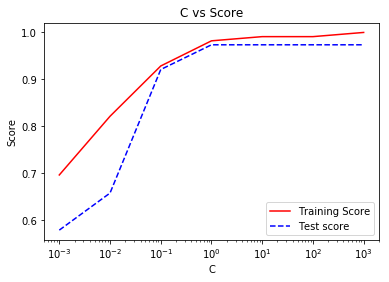

In [21]:
plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], train_score, '-r', label='Training Score')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], test_score, '--b', label='Test score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C vs Score')
plt.legend(loc='lower right');

From the chart above, the model complexity goes from left to right; low value of C means low complexity because the regularization effect is stronger and high value of C means high complexity because the regularization effect is weaker. Also, low value of C makes the score for the training set and test set are both bad, an indication that the model is underfit. To the right of chart, after C equals one, the test set score is not changing. So we can take C equals one to be a good parameter to use in this iris dataset. 

In [22]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', C=1, max_iter=1000000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(log.score(X_train, y_train)))
print("Test set score: {:.3f}".format(log.score(X_test, y_test)))

Training set score: 0.982
Test set score: 0.974


__Conclusion:__ <br>
LogisticRegression makes a good performance for both training set and test set.

---

## LinearSVC

LinearSVC implements the linear model concept, just like LogisticRegression. With same common parameter to tune, which is C. Now, we start by using the default settings and make adjusments later.

In [23]:
from sklearn.svm import LinearSVC

# instantiate the model with default settings
lin_svc = LinearSVC(max_iter=1000000).fit(X_train, y_train)

In [24]:
print("First 10 predicted values:\n{}".format(lin_svc.predict(X_test)[:10]))
print("First 10 test set values:\n{}".format(y_test[:10]))

First 10 predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First 10 test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


We can see that first ten data points for both predicted and test set are correct 100%. But, what about the score?

In [25]:
print("Training set score: {:.3f}".format(lin_svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lin_svc.score(X_test, y_test)))

Training set score: 0.982
Test set score: 0.921


Good score for training set and not so good score for test set. Can we get a better performance if we tune the parameter C?

In [26]:
train_score = []
test_score = []

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    lin_svc = LinearSVC(max_iter=10000000, C=c).fit(X_train, y_train)
    train_score.append(lin_svc.score(X_train, y_train))
    test_score.append(lin_svc.score(X_test, y_test))

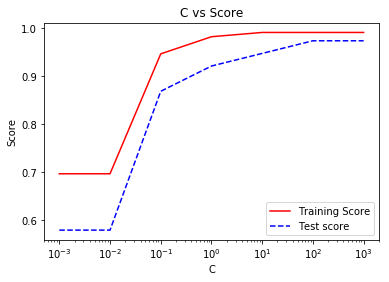

In [27]:
plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], train_score, '-r', label='Training Score')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], test_score, '--b', label='Test score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C vs Score')
plt.legend(loc='lower right');

Not so different from C vs Score graph of LogisticRegression, this graph tells us that low value of C means low complexity model and high value of C means high complexity model. At the right side, score for training set and test set tend to converge together, but we still have to be careful about the probability that the model will overfit training set. So, we have take look at what happen when the value of C = 10000.

In [28]:
lin_svc = LinearSVC(max_iter=10000000, C=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lin_svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lin_svc.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.974


__Conclusion:__ <br>
LinearSVC makes a good prediction just like LogisticRegression does, but one thing to consider, LinearSVC needs high value of iteration to make it converge and take a bit long time than LogisticRegression.

---

## GaussianNB

Now, we consider Naive Bayes algorithm. Common algorithms in naive bayes are GaussianNB, MultinomialNB, and BinomialNB. But this time we just use GaussianNB to make prediction, known as a good model to start because no parameter tuning necessary.

In [29]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gaussian = GaussianNB().fit(X_train, y_train)
# take a look on first ten predicted values and test set values
print("First ten predicted values:\n{}".format(gaussian.predict(X_test)[:10]))
print("First ten test set values:\n{}".format(y_test[:10]))

First ten predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First ten test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


In [30]:
print("Training set score: {:.3f}".format(gaussian.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gaussian.score(X_test, y_test)))

Training set score: 0.946
Test set score: 1.000


__Conclusion:__ <br>
GaussianNB doesn't need parameter tuning, which makes it a good model for its simplicity. Also, as we can see above, one of the reason why training set score is lower than test set is because the dataset size is pretty small.

---

## DecisionTreeClassifier

Now, we enter more advanced region of machine learning algorithms. This time we consider DecisionTreeClassifier, an algorithm that works by asking questions (or we can call it tests) to make classification. We start by default parameter settings.

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)

Take a look on first ten predicted values and test set values to compare:

In [32]:
print("First ten predicted values:\n{}".format(gaussian.predict(X_test)[:10]))
print("First ten test set values:\n{}".format(y_test[:10]))

First ten predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First ten test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


In [33]:
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.974


Perfect score for training set, but not so good on test set score, an indication that probably the model tends to overfit the training set, because the default settings make the tree wants to achieve pure leaves as many as possible. Then, let's see what will happen when we change the parameter max_depth (pre-prunning control).

In [34]:
tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

Training set score: 0.982
Test set score: 0.974


In [35]:
train_score = []
test_score = []

for depth in range(1, 6):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))

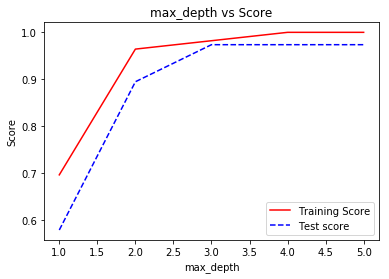

In [36]:
plt.plot(range(1, 6), train_score, '-r', label='Training Score')
plt.plot(range(1, 6), test_score, '--b', label='Test score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('max_depth vs Score')
plt.legend(loc='lower right');

As we see on the graph above, we can conclude that a good decision of max_depth parameter is 3, because this is the sweet spot without underfiting or overfitting the model.

Now, from four features in iris dataset can we conclude which one that make the most important decision on classification process? Let's have a sight on feature_importances:

In [37]:
tree.feature_importances_

array([0.        , 0.02014872, 0.39927524, 0.58057605])

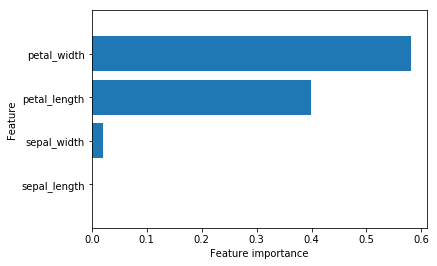

In [38]:
def plot_feature_importances(model, dataset, X):
    plt.barh(range(X.shape[1]), model.feature_importances_, align='center')
    plt.yticks(range(X.shape[1]), list(dataset.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, X.shape[1])
    
plot_feature_importances(tree, dataset, X)

From graph above, we can see that the important features for classification are petal_width and petal_length.

__Conclusion:__ <br>
More complex model like DecisionTreeClassifier makes not so different prediction from simpler model that we have considered before, because our dataset type is not high dimensional also the dataset size is pretty small, so DecisionTreeClassifier probably not a good choice to use for this particular dataset. Another important point is DecisionTreeClassifier tends to overfit the training set. Then we have to move on to another algorithm that tackle this kind of problem.

---

## RandomForestClassifier

RandomForestClassifier implements the same concept as DecisionTreeClassifier but with improvement to control the overfit behavior DecisionTreeClassifier has. This time we will consider the parameter n_estimators and max_depth.

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)

Let's take a look on predicted values and test set values to compare:

In [40]:
print("First ten predicted values:\n{}".format(rfc.predict(X_test)[:10]))
print("First ten test set values:\n{}".format(y_test[:10]))

First ten predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First ten test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


In [41]:
# training set score and test set score
print("Training set score: {:.3f}".format(rfc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.947


Let's see the graph of model complexity vs score with parameter n_estimators:

In [42]:
train_score = []
test_score = []

for estimators in np.arange(10, 110, 10):
    rfc = RandomForestClassifier(n_estimators=estimators, random_state=0).fit(X_train, y_train)
    train_score.append(rfc.score(X_train, y_train))
    test_score.append(rfc.score(X_test, y_test))

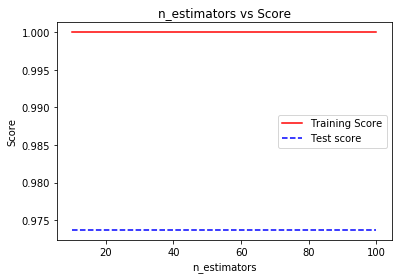

In [43]:
plt.plot(np.arange(10, 110, 10), train_score, '-r', label='Training Score')
plt.plot(np.arange(10, 110, 10), test_score, '--b', label='Test score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('n_estimators vs Score')
plt.legend(loc='best');

Now see the graph of model complexity vs score with parameter max_depth:

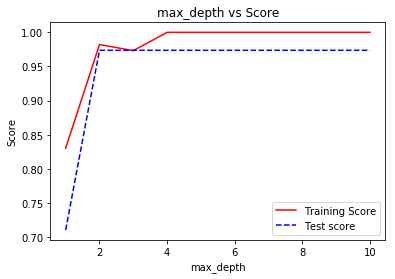

In [44]:
train_score = []
test_score = []

for depth in range(1, 11):
    rfc = RandomForestClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
    train_score.append(rfc.score(X_train, y_train))
    test_score.append(rfc.score(X_test, y_test))

plt.plot(range(1, 11), train_score, '-r', label='Training Score')
plt.plot(range(1, 11), test_score, '--b', label='Test score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('max_depth vs Score')
plt.legend(loc='best');

__Conclusion:__ <br>
From the two graphs above, changing parameter is not making any big changes to our score both for the training set and test set. Eventhough, usualy ensemble machine learning algorithms tend to sensitive to paramaters tuning.

---

## GradientBosstingClassifier

Another ensemble machine learning algorithm that implements the concept of Decision Tree algorithm is GradientBoostingClassifier.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier().fit(X_train, y_train)

Let's take a look on predicted values and test set values to compare:

In [46]:
print("First ten predicted values:\n{}".format(gbrt.predict(X_test)[:10]))
print("First ten test set values:\n{}".format(y_test[:10]))

First ten predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First ten test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


In [47]:
# training set score and test set score
print("Training set score: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.974


Accuracy score for training set is 100% and for test set 97%, an indication that our model tends to overfit. We can control this by tuning the paramater, let's start by considering parameter learning_rate.

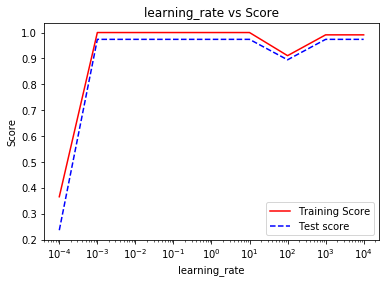

In [48]:
train_score = []
test_score = []

for rate in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    gbrt = GradientBoostingClassifier(learning_rate=rate, random_state=0).fit(X_train, y_train)
    train_score.append(gbrt.score(X_train, y_train))
    test_score.append(gbrt.score(X_test, y_test))

plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], train_score, '-r', label='Training Score')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], test_score, '--b', label='Test score')
plt.xscale('log')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('learning_rate vs Score')
plt.legend(loc='best');

__Conclusion:__ <br>
Not so different from RandomForestClassifier, complex model on simple dataset is not a good choice.

---

## Support Vector Classifier (SVC)

In [49]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
print("First ten predicted values:\n{}".format(svc.predict(X_test)[:10]))
print("First ten test set values:\n{}".format(y_test[:10]))

First ten predicted values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']
First ten test set values:
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor']


Let's look at training set and test set score:

In [50]:
# training set score and test set score
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 0.982
Test set score: 0.974


---

# Summary:

We have considered 8 different machine learning algorithms, start from the simpler model like KNeighborsClassifier to more complex model like SVC. From our exploratory predictive modeling we know that simple dataset with low dimensional and small size data, we can use a simple model to make a prediction, without the tuning parameter choices. If simple model is do a good performance, why we have to use a more complex model, that probably need more resources like time and memory. So the good rules of thumb are first consider simple model and if simple model do a good prediction, it is better to just use it. But it is also depends on the nature of dataset itself.